In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import pandas as pd
train=pd.read_csv('bigdatamart_Train.csv')
test=pd.read_csv('bigdatamart_Test.csv')

In [5]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [8]:
#Combining the 2 datasets
train['source']='train'   #For identifying train data
test['source']='test'     #For identifying test data
test['Item_Outlet_Sales']= 0   #As we don't know the Item outlet sales in test, we are assuming as 0
df=pd.concat([test,train],ignore_index=True)   #Combining using concat
print(train.shape,test.shape,df.shape)  

(8523, 13) (5681, 13) (14204, 13)


In [9]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,source,Item_Outlet_Sales
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,test,0.0000
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,test,0.0000
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,test,0.0000
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,test,0.0000
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,test,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,train,2778.3834
14200,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,train,549.2850
14201,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,train,1193.1136
14202,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,train,1845.5976


In [10]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'source', 'Item_Outlet_Sales'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  source                     14204 non-null  object 
 12  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usag

In [12]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
source                          0
Item_Outlet_Sales               0
dtype: int64

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Outlet_Establishment_Year vs. Item_Outlet_Sales')

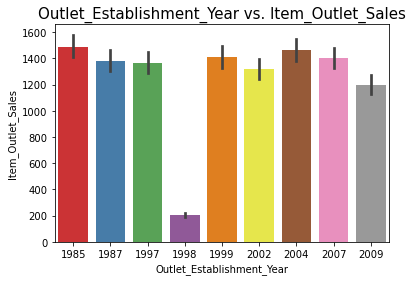

In [14]:
outlet=sns.barplot(x='Outlet_Establishment_Year', y='Item_Outlet_Sales', data=df, palette="Set1")
outlet.set_title("Outlet_Establishment_Year vs. Item_Outlet_Sales", fontsize=15)

Text(0.5, 1.0, 'Outlet_Identifier vs. Item_Outlet_Sales')

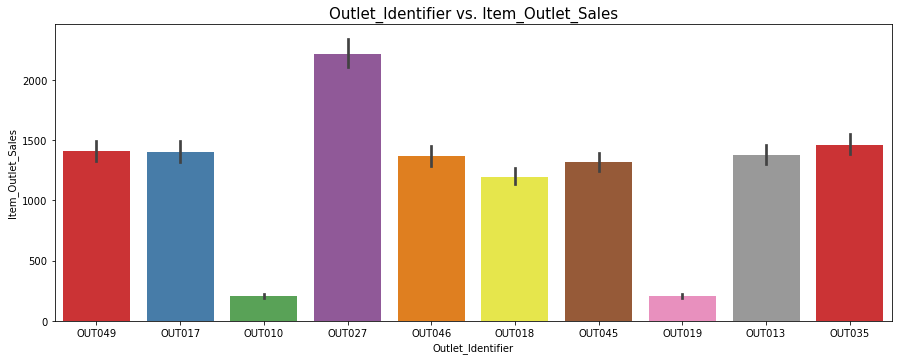

In [15]:
plt.figure(figsize = (15,12)) 
plt.subplot(211) 
OI=sns.barplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=df, palette="Set1")
OI.set_title("Outlet_Identifier vs. Item_Outlet_Sales", fontsize=15)

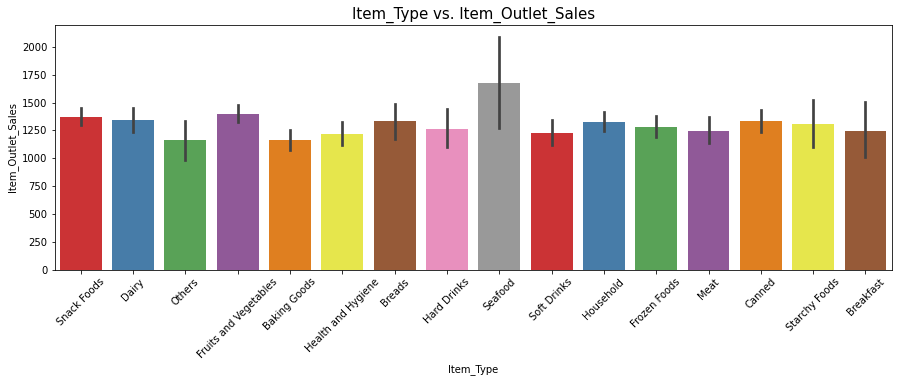

In [16]:
plt.figure(figsize = (15,12)) 
plt.subplot(312) 
item=sns.barplot(x='Item_Type', y='Item_Outlet_Sales', data=df, palette="Set1")
item.set_title("Item_Type vs. Item_Outlet_Sales", fontsize=15)
plt.setp(item.get_xticklabels(), rotation=45) 


plt.subplots_adjust(wspace = 0.1, hspace = 0.4,top = 1.2)

<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

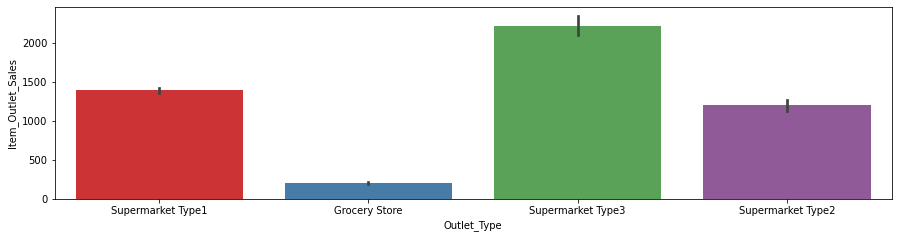

In [19]:
plt.figure(figsize = (15,12)) 
plt.subplot(313) 
sns.barplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df, palette="Set1")

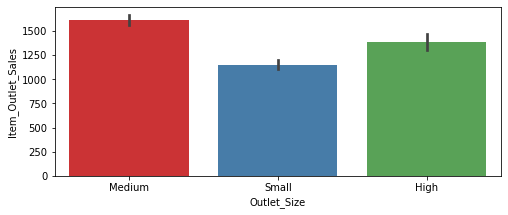

In [20]:
plt.figure(figsize = (8,7)) 

plt.subplot(311)
sns.barplot(x='Outlet_Size', y='Item_Outlet_Sales', data=df, palette="Set1")
plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 1.4) 

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_MRP'>

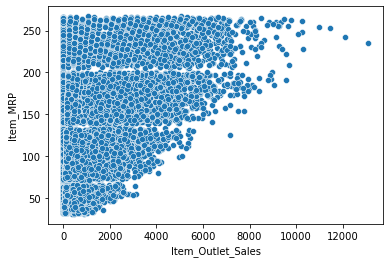

In [21]:
sns.scatterplot(x='Item_Outlet_Sales',y='Item_MRP',data=df)

<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Visibility'>

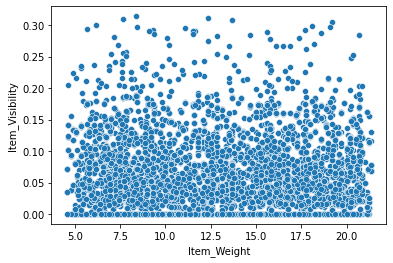

In [22]:
sns.scatterplot(x='Item_Weight',y='Item_Visibility',data=df)

<AxesSubplot:xlabel='Item_Outlet_Sales'>

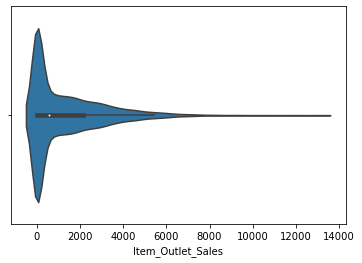

In [23]:
sns.violinplot(x='Item_Outlet_Sales',data=df)


<AxesSubplot:xlabel='Item_MRP'>

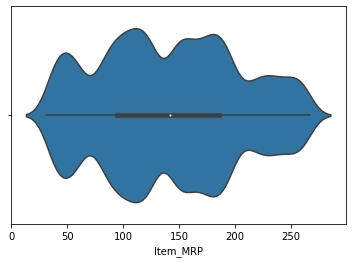

In [24]:
sns.violinplot(x='Item_MRP',data=df)

In [25]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.792854,0.065953,141.004977,1997.830681,1308.865489
std,4.652502,0.051459,62.086938,8.371664,1699.791423
min,4.555000,0.000000,31.290000,1985.000000,0.000000
25%,8.710000,0.027036,94.012000,1987.000000,0.000000
50%,12.600000,0.054021,142.247000,1999.000000,559.272000
75%,16.750000,0.094037,185.855600,2004.000000,2163.184200
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [26]:
corr=df.corr()
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.015901,0.036236,0.000645,0.019447
Item_Visibility,-0.015901,1.000000,-0.006351,-0.083678,-0.075008
Item_MRP,0.036236,-0.006351,1.000000,0.000141,0.342781
Outlet_Establishment_Year,0.000645,-0.083678,0.000141,1.000000,-0.029489
Item_Outlet_Sales,0.019447,-0.075008,0.342781,-0.029489,1.000000


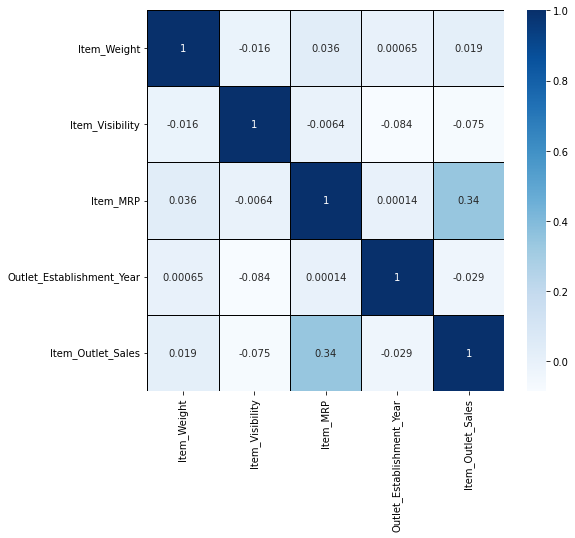

In [27]:
plt.figure(figsize=(8,7))
sns.heatmap(corr,linewidth=0.5,linecolor='black',cmap='Blues',annot=True)
plt.show()

In [28]:
df['Outlet_Years'] = 2013 - df['Outlet_Establishment_Year']
df['Outlet_Years'].describe().T

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

In [29]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,source,Item_Outlet_Sales,Outlet_Years
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,test,0.0,14
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,test,0.0,6
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,test,0.0,15
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,test,0.0,6
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,test,0.0,28


In [30]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
source                          0
Item_Outlet_Sales               0
Outlet_Years                    0
dtype: int64

In [32]:
import numpy as np
df['Item_Weight']=df['Item_Weight'].replace(np.NaN,df['Item_Weight'].mean())

In [34]:
from sklearn.impute import SimpleImputer
SI = SimpleImputer(strategy='most_frequent')
df['Outlet_Size']=SI.fit_transform(df['Outlet_Size'].values.reshape(-1,1)) 
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,source,Item_Outlet_Sales,Outlet_Years
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,test,0.0000,14
1,FDW14,8.300000,reg,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1,test,0.0000,6
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store,test,0.0000,15
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1,test,0.0000,6
4,FDY38,12.792854,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,test,0.0000,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDF22,6.865000,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,train,2778.3834,26
14200,FDS36,8.380000,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,train,549.2850,11
14201,NCJ29,10.600000,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,train,1193.1136,9
14202,FDN46,7.210000,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,train,1845.5976,4


In [36]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
source                       0
Item_Outlet_Sales            0
Outlet_Years                 0
dtype: int64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  int32  
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  int32  
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  int32  
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  int32  
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  int32  
 9   Outlet_Location_Type       14204 non-null  int32  
 10  Outlet_Type                14204 non-null  int32  
 11  source                     14204 non-null  int32  
 12  Item_Outlet_Sales          14204 non-null  float64
 13  Outlet_Years               14204 non-null  int

In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
col = ['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','source','Outlet_Establishment_Year'
       ,'Outlet_Location_Type','Outlet_Size','Outlet_Type']   
for i in col:
    df[i] = le.fit_transform(df[i])  

In [41]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,source,Item_Outlet_Sales,Outlet_Years
0,1114,20.750000,1,0.007565,13,107.8622,9,4,1,0,1,0,0.0,14
1,1078,8.300000,4,0.038428,4,87.3198,2,7,1,1,1,0,0.0,6
2,1420,14.600000,1,0.099575,11,241.7538,0,3,1,2,0,0,0.0,15
3,817,7.315000,1,0.015388,13,155.0340,2,7,1,1,1,0,0.0,6
4,1197,12.792854,2,0.118599,4,234.2300,5,0,1,2,3,0,0.0,28


In [42]:
df.dtypes

Item_Identifier                int64
Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                      int64
Item_MRP                     float64
Outlet_Identifier              int64
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Outlet_Type                    int64
source                         int64
Item_Outlet_Sales            float64
Outlet_Years                   int64
dtype: object

In [43]:
corr=df.corr()
corr

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,source,Item_Outlet_Sales,Outlet_Years
Item_Identifier,1.000000,0.047101,-0.096220,-0.040775,-0.012048,0.010743,-0.001089,-0.003173,0.002581,-0.002473,-0.004532,-0.001305,0.000906,0.002954
Item_Weight,0.047101,1.000000,-0.027387,-0.013641,0.028637,0.033002,0.003274,0.000503,0.001580,-0.002104,0.001699,0.015526,0.016425,-0.000462
Item_Fat_Content,-0.096220,-0.027387,1.000000,0.033864,-0.121140,-0.006195,-0.001733,-0.002541,-0.007084,-0.002518,-0.002380,0.000442,0.006195,0.004135
Item_Visibility,-0.040775,-0.013641,0.033864,1.000000,-0.035646,-0.006351,-0.106181,-0.091511,0.064836,-0.017362,-0.165726,0.004267,-0.075008,0.083678
Item_Type,-0.012048,0.028637,-0.121140,-0.035646,1.000000,0.043948,0.001126,0.003295,-0.002608,0.002083,0.004305,-0.000782,0.009769,-0.003061
Item_MRP,0.010743,0.033002,-0.006195,-0.006351,0.043948,1.000000,-0.000555,0.000302,-0.001018,0.000838,0.000136,-0.000241,0.342781,-0.000141
Outlet_Identifier,-0.001089,0.003274,-0.001733,-0.106181,0.001126,-0.000555,1.000000,-0.030948,0.504580,-0.716151,0.099899,-0.000083,0.097733,-0.079047
Outlet_Establishment_Year,-0.003173,0.000503,-0.002541,-0.091511,0.003295,0.000302,-0.030948,1.000000,0.070796,0.041889,-0.040255,0.000186,-0.015260,-0.970787
Outlet_Size,0.002581,0.001580,-0.007084,0.064836,-0.002608,-0.001018,0.504580,0.070796,1.000000,-0.614300,-0.201505,-0.000072,-0.051962,-0.193392
Outlet_Location_Type,-0.002473,-0.002104,-0.002518,-0.017362,0.002083,0.000838,-0.716151,0.041889,-0.614300,1.000000,0.467251,0.000023,0.053848,0.089328


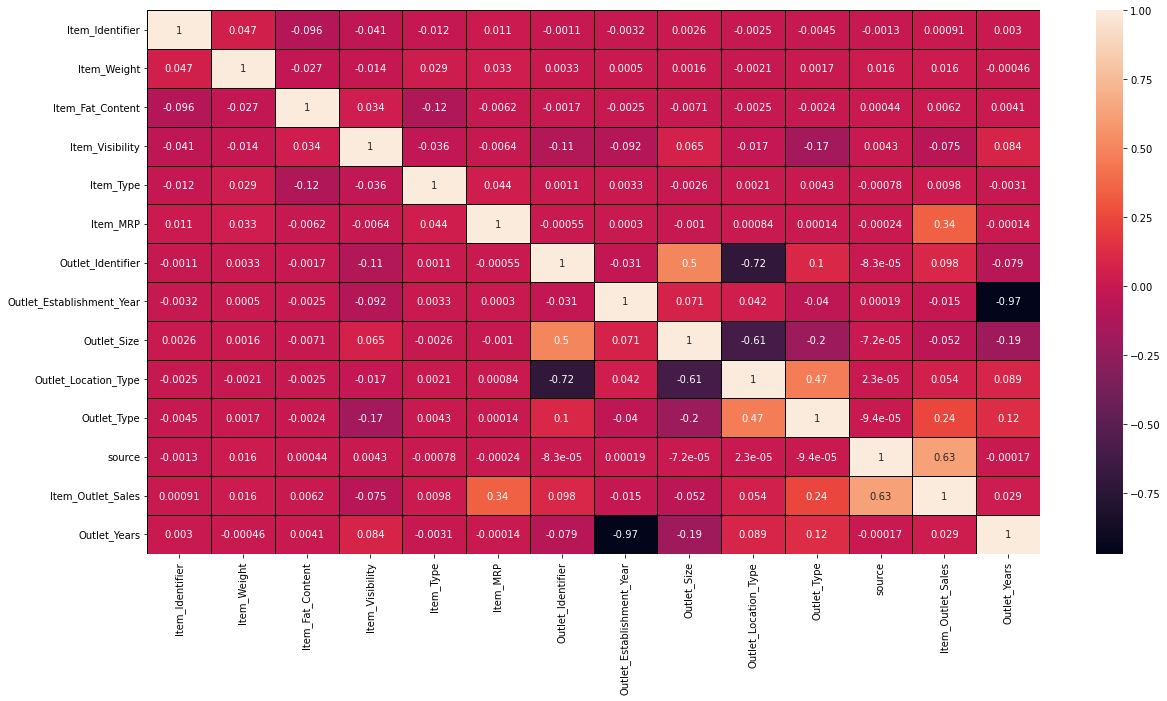

In [44]:
plt.figure(figsize=(20,10))
sns.heatmap(corr,linewidth=0.5,linecolor='black',annot=True)
plt.show()

In [45]:
df.skew()

Item_Identifier             -0.004897
Item_Weight                  0.111314
Item_Fat_Content             0.996640
Item_Visibility              1.195175
Item_Type                    0.099574
Item_MRP                     0.130728
Outlet_Identifier           -0.059994
Outlet_Establishment_Year    0.034412
Outlet_Size                 -0.087077
Outlet_Location_Type        -0.209053
Outlet_Type                  0.927344
source                      -0.408471
Item_Outlet_Sales            1.544684
Outlet_Years                 0.396465
dtype: float64

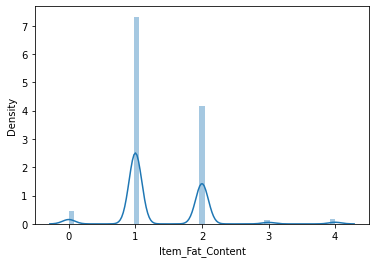

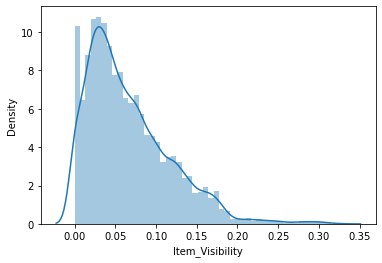

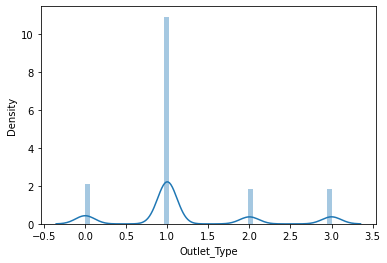

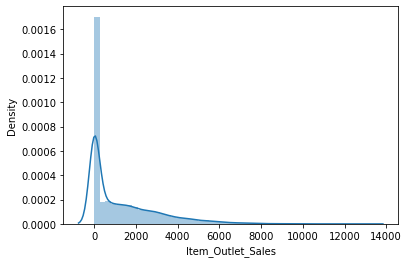

In [46]:
skewcol= ['Item_Fat_Content','Item_Visibility','Outlet_Type','Item_Outlet_Sales'] 
for i in skewcol:
    sns.distplot(df[i])
    plt.show()

<AxesSubplot:>

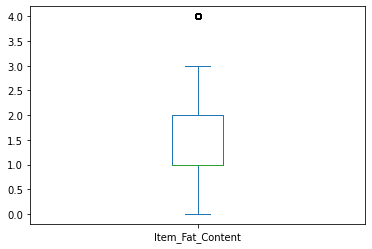

In [49]:
df['Item_Fat_Content'].plot.box()

<AxesSubplot:>

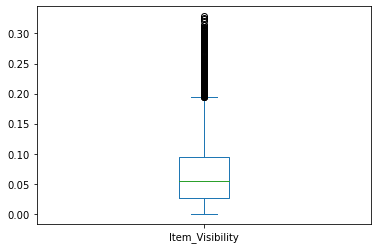

In [50]:
df['Item_Visibility'].plot.box()

<AxesSubplot:>

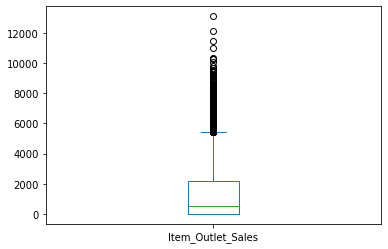

In [51]:
df['Item_Outlet_Sales'].plot.box()

<AxesSubplot:>

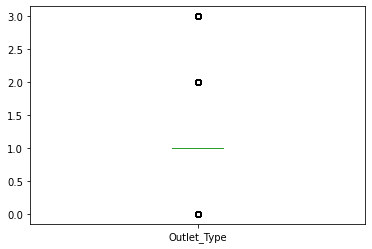

In [52]:
df['Outlet_Type'].plot.box()

In [53]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))   #converting all values into absolute values
threshold=3    #setting up a threshold
np.where(z>3)

(array([    1,    46,    76,    78,    89,   103,   138,   242,   333,
          369,   385,   474,   499,   543,   595,   637,   739,   783,
          797,   815,   858,   871,   985,   996,  1025,  1037,  1046,
         1105,  1143,  1191,  1256,  1256,  1270,  1284,  1314,  1321,
         1411,  1422,  1437,  1516,  1539,  1616,  1710,  1757,  1780,
         1812,  1823,  1853,  1857,  1915,  1919,  1927,  2019,  2070,
         2167,  2179,  2230,  2271,  2275,  2365,  2365,  2380,  2393,
         2504,  2516,  2561,  2595,  2605,  2609,  2625,  2628,  2677,
         2779,  2798,  2836,  2843,  2866,  2915,  2926,  3039,  3077,
         3097,  3267,  3294,  3313,  3316,  3357,  3362,  3378,  3461,
         3502,  3565,  3622,  3638,  3679,  3744,  3778,  3783,  3950,
         3970,  4021,  4052,  4133,  4146,  4147,  4148,  4159,  4208,
         4232,  4255,  4328,  4330,  4334,  4340,  4352,  4365,  4421,
         4478,  4542,  4575,  4616,  4616,  4689,  4692,  4726,  4801,
      

In [54]:
df_new=df[(z<3).all(axis=1)]
df_new

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,source,Item_Outlet_Sales,Outlet_Years
0,1114,20.750000,1,0.007565,13,107.8622,9,4,1,0,1,0,0.0000,14
2,1420,14.600000,1,0.099575,11,241.7538,0,3,1,2,0,0,0.0000,15
3,817,7.315000,1,0.015388,13,155.0340,2,7,1,1,1,0,0.0000,6
4,1197,12.792854,2,0.118599,4,234.2300,5,0,1,2,3,0,0.0000,28
5,465,9.800000,2,0.063817,6,117.1492,8,2,2,0,1,0,0.0000,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,370,6.865000,1,0.056783,13,214.5218,1,1,0,2,1,1,2778.3834,26
14200,897,8.380000,2,0.046982,0,108.1570,7,5,1,1,1,1,549.2850,11
14201,1357,10.600000,1,0.035186,8,85.1224,6,6,2,1,1,1,1193.1136,9
14202,681,7.210000,2,0.145221,13,103.1332,3,8,1,2,2,1,1845.5976,4


In [56]:
df.shape
 

(14204, 14)

In [57]:
df_new.shape 

(13637, 14)

In [58]:
percentage_loss=((567)/14204)*100   #567 = 14204-13637
print(percentage_loss)

3.991833286398198


In [59]:
for col in df_new.columns:
    if df_new.skew().loc[col]>0.55:
        df_new[col]=np.log1p(df_new[col])

In [60]:
df_new.skew() 

Item_Identifier             -0.007206
Item_Weight                  0.107797
Item_Fat_Content             0.284306
Item_Visibility              0.710667
Item_Type                    0.091851
Item_MRP                     0.144519
Outlet_Identifier           -0.067703
Outlet_Establishment_Year    0.012625
Outlet_Size                 -0.087967
Outlet_Location_Type        -0.202324
Outlet_Type                 -0.237767
source                      -0.385539
Item_Outlet_Sales           -0.268402
Outlet_Years                 0.423675
dtype: float64

In [62]:
x=df_new.drop('Item_Outlet_Sales',axis=1)   
y=df_new['Item_Outlet_Sales'] 

In [63]:
x.head

<bound method NDFrame.head of        Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 1114    20.750000                 1         0.007536   
2                 1420    14.600000                 1         0.094924   
3                  817     7.315000                 1         0.015271   
4                 1197    12.792854                 2         0.112077   
5                  465     9.800000                 2         0.061864   
...                ...          ...               ...              ...   
14199              370     6.865000                 1         0.055230   
14200              897     8.380000                 2         0.045912   
14201             1357    10.600000                 1         0.034581   
14202              681     7.210000                 2         0.135597   
14203               50    14.800000                 1         0.043900   

       Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0    

In [64]:
y

0        0.000000
2        0.000000
3        0.000000
4        0.000000
5        0.000000
           ...   
14199    7.929984
14200    6.310436
14201    7.085159
14202    7.521100
14203    6.642056
Name: Item_Outlet_Sales, Length: 13637, dtype: float64

In [66]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 7.36059157e-01,  1.86539187e+00, -5.84964117e-01, ...,
        -1.02612632e-01, -1.21115474e+00, -1.20579793e-01],
       [ 1.41360894e+00,  4.22698286e-01, -5.84964117e-01, ...,
        -2.06803592e+00, -1.21115474e+00, -3.61439649e-04],
       [ 7.84373110e-02, -1.28624851e+00, -5.84964117e-01, ...,
        -1.02612632e-01, -1.21115474e+00, -1.08232662e+00],
       ...,
       [ 1.27411340e+00, -5.15639007e-01, -5.84964117e-01, ...,
        -1.02612632e-01,  8.25658330e-01, -7.21671560e-01],
       [-2.22695925e-01, -1.31087986e+00,  1.17950296e+00, ...,
         1.04708629e+00,  8.25658330e-01, -1.32276333e+00],
       [-1.61986557e+00,  4.69615150e-01, -5.84964117e-01, ...,
        -1.02612632e-01,  8.25658330e-01,  1.19856914e-01]])

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [81]:
best_rstate=0
accuracy=0
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,2)==round(r2_score(y_test,pred_test)*100,2):
        print('At random state',i,',the model performs well')
        print('Training r2_score is: ',r2_score(y_train,pred_train)*100)
        print('Testing r2_score is: ',r2_score(y_test,pred_test)*100)

At random state 24 ,the model performs well
Training r2_score is:  97.28516541337815
Testing r2_score is:  97.28900760150509
At random state 106 ,the model performs well
Training r2_score is:  97.28586632714563
Testing r2_score is:  97.28755353948492
At random state 109 ,the model performs well
Training r2_score is:  97.28693188935631
Testing r2_score is:  97.2855126076708
At random state 275 ,the model performs well
Training r2_score is:  97.28597597386532
Testing r2_score is:  97.28750761432924
At random state 279 ,the model performs well
Training r2_score is:  97.28641034763555
Testing r2_score is:  97.28744708959451
At random state 294 ,the model performs well
Training r2_score is:  97.28551982630272
Testing r2_score is:  97.28798393560024
At random state 441 ,the model performs well
Training r2_score is:  97.2857406142998
Testing r2_score is:  97.28846132767116
At random state 451 ,the model performs well
Training r2_score is:  97.28503584944754
Testing r2_score is:  97.2922998487

In [84]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=451,test_size=.20)

In [85]:
#Importing the models we are going to use
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [86]:
LR=LinearRegression()
rfr=RandomForestRegressor()
svr=SVR()
dtr=DecisionTreeRegressor()

In [88]:
models= []
models.append(('Linear Regression',LR))
models.append(('Random Forest Regressor',rfr))
models.append(('Support Vector Regressor',svr))
models.append(('Decision Tree Regressor',dtr))

In [89]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score
import numpy as np